### Mise en place des librairies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importation des données 

In [49]:
erp= pd.read_excel('erp.xlsx')

In [43]:
link= pd.read_excel('liaison.xlsx')

C:\Users\samir\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [44]:
web = pd.read_excel('web.xlsx')

### Nettoyage des données 

In [52]:
#Nettoyage du premier dataframe 'erp'
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1.0,24.2,0.0,outofstock
1,3849,1.0,34.3,0.0,outofstock
2,3850,1.0,20.8,0.0,outofstock
3,4032,1.0,14.1,0.0,outofstock
4,4039,1.0,46.0,0.0,outofstock


In [50]:
erp.shape

(825, 5)

In [51]:
#changement du type pour les colonnes concernées pour les mettre en décimale afin de pouvoir faire des calcules 
var_modif = ["onsale_web","price","stock_quantity"]

for var in var_modif : 
    erp[var]= erp[var].astype("float")

In [54]:
#detection de valeurs manquantes 
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [55]:
# Identifier le nombre de doublons  
len(erp.index)-len(erp.drop_duplicates(subset='product_id').index)

0

In [56]:
#Nettoyage du dataframe 'web'
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [57]:
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [60]:
#Identifier les valeurs manquantes 
print(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [61]:
# Suppression des valeurs manquantes 
web=web.dropna(subset=['sku'])

In [62]:
print(web.isnull().sum())

sku                         0
virtual                     0
downloadable                0
rating_count                0
average_rating              0
total_sales                 0
tax_status                714
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_status                 0
comment_status              0
ping_status                 0
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
post_parent                 0
guid                        0
menu_order                  0
post_type                   0
post_mime_type            714
comment_count               0
dtype: int64


In [63]:
#Identifier le nombre de doublons
len(web.index)-len(web.drop_duplicates(subset='sku').index)

714

In [66]:
#Analyser d'où viennent ces doublons 
web.sort_values(by='post_date').head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [67]:
# Une les doublons identifier on selectionne que l'information dont on a besoin et ainsi supprimer les doublons 
web=web.loc[web['post_type']=='product']

In [70]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

In [71]:
#Nettoyage du dataframe 'link'
link.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [72]:
#Identifier le nombre de valeurs manquantes 
print(link.isnull().sum())

product_id     0
id_web        91
dtype: int64


In [73]:
#Identifier le nombre de doublons 
print(len(link.index)-len(link.drop_duplicates(subset='product_id').index))
print(len(link.index)-len(link.drop_duplicates(subset='id_web').index))

0
90


In [74]:
#supression des valeurs manquantes 
link=link.dropna()

In [75]:
#Contrôle suite à la manipulation si valeurs manquantes
print(link.isnull().sum())

product_id    0
id_web        0
dtype: int64


In [76]:
#Contrôle suite à la manipulation si doublons toujours présents 
print(len(link.index)-len(link.drop_duplicates(subset='product_id').index))
print(len(link.index)-len(link.drop_duplicates(subset='id_web').index))

0
0


### Rapprochement des données 

In [142]:
#On regroupe les données du dataframe 'erp' et'link' dans un dataframe 'erp_link'
erp_link=erp.merge(link,on='product_id', how='outer',indicator=True)
#argument 'indicator'permet de savoir pour chaque ligne si elle apparait dans les 2 tableaux, ou uniquement sur celui de gauche ou de droite

In [143]:
erp_link.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1.0,24.2,0.0,outofstock,15298,both
1,3849,1.0,34.3,0.0,outofstock,15296,both
2,3850,1.0,20.8,0.0,outofstock,15300,both
3,4032,1.0,14.1,0.0,outofstock,19814,both
4,4039,1.0,46.0,0.0,outofstock,19815,both


In [144]:
#On compte combien de valeurs sont présents dans les 2 tableaux, ou uniquement celui de gauche ou droite
erp_link['_merge'].value_counts()

both          734
left_only      91
right_only      0
Name: _merge, dtype: int64

In [ ]:
#On constate que 91 références de vins n'apparaissent pas dans le fichier 'link' car soit ils ne sont pas vendus en ligne, soit le fichier est incomplet et nous n'avons pas toutes les references 

In [139]:
# On regroupe les dataframes 'erp_link' et 'erp_web' dans dataframe final  'erp_web' afin de pouvoir faire les calcules 
erp_web=erp_link.merge(web, left_on='id_web', right_on='sku', how='outer', indicator= True)
#argument 'indicator'permet de savoir pour chaque ligne si elle apparait dans les 2 tableaux, ou uniquement sur celui de gauche ou de droite

In [140]:
erp_web.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1.0,24.2,0.0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1.0,34.3,0.0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1.0,20.8,0.0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1.0,14.1,0.0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1.0,46.0,0.0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
5,4040,1.0,34.3,0.0,outofstock,15303,15303,0.0,0.0,0.0,...,2019-11-02 13:25:07,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
6,4041,1.0,32.7,15.0,instock,14975,14975,0.0,0.0,0.0,...,2020-08-14 18:15:02,2020-08-14 16:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
7,4042,1.0,31.2,34.0,instock,16042,16042,0.0,0.0,0.0,...,2020-08-14 10:15:02,2020-08-14 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
8,4043,1.0,60.0,12.0,instock,14980,14980,0.0,0.0,0.0,...,2020-08-24 14:00:03,2020-08-24 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
9,4045,1.0,42.6,66.0,instock,16041,16041,0.0,0.0,0.0,...,2020-08-03 09:55:03,2020-08-03 07:55:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [141]:
#suite au 'merge' on identifie le nombre de valeurs présents dans les 2 tableaux ou uniquement dans celui de gauche ou de droite
erp_web['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

In [ ]:
#On constate que 111 références ne sont pas présents dans le fichier 'web' car soit pas vendu en ligne soit données incompletes
#Pour plus de pertinence dans l'analyse on recommande aux services compétents de reprendre les fichiers et de trouver la référence web (sku) des produits (product_id) vendus en ligne mais dont on a pas la correspondance

### Chiffre d'affaire par produit

In [90]:
#Pour une plus grande lisibilité on regroupe que les colonnes utiles pour faire le calcul 
erp_web1 = erp_web[['product_id','id_web','sku','onsale_web','price','total_sales']]

In [91]:
erp_web1.head()

,product_id,id_web,sku,onsale_web,price,total_sales
0,3847,15298,15298,1.0,24.2,6.0
1,3849,15296,15296,1.0,34.3,0.0
2,3850,15300,15300,1.0,20.8,0.0
3,4032,19814,19814,1.0,14.1,3.0
4,4039,19815,19815,1.0,46.0,0.0


In [94]:
#Création d'une colonne 'ca_produit' qui correspond à la mutliplication du prix avec le nombre de ventes 
erp_web1['ca_produit']= erp_web1['price']*erp_web1['total_sales']

C:\Users\samir\AppData\Local\Temp/ipykernel_24408/218977317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_web1['ca_produit']= erp_web1['price']*erp_web1['total_sales']


In [95]:
erp_web1.head()

,product_id,id_web,sku,onsale_web,price,total_sales,ca_produit
0,3847,15298,15298,1.0,24.2,6.0,145.2
1,3849,15296,15296,1.0,34.3,0.0,0.0
2,3850,15300,15300,1.0,20.8,0.0,0.0
3,4032,19814,19814,1.0,14.1,3.0,42.3
4,4039,19815,19815,1.0,46.0,0.0,0.0


### Total du chiffre d'affaire realisé en ligne

In [103]:
#Selection des produits disponibles à la vente sur internet 
erp_web1.loc[erp_web1['onsale_web'] == 1.0]

,product_id,id_web,sku,onsale_web,price,total_sales,ca_produit
0,3847,15298,15298,1.0,24.2,6.0,145.2
1,3849,15296,15296,1.0,34.3,0.0,0.0
2,3850,15300,15300,1.0,20.8,0.0,0.0
3,4032,19814,19814,1.0,14.1,3.0,42.3
4,4039,19815,19815,1.0,46.0,0.0,0.0
...,...,...,...,...,...,...,...
819,6930,16135,16135,1.0,8.4,5.0,42.0
820,7023,15891,15891,1.0,27.5,0.0,0.0
821,7025,15887,15887,1.0,69.0,0.0,0.0
822,7247,13127-1,13127-1,1.0,54.8,0.0,0.0


In [104]:
#On fait la somme de tous les chiffres d'affaire par produit vendus sur internet 
erp_web1['ca_produit'].sum()

70568.6

### Détection des valeurs atypiques (méthode par IQR)

In [108]:
#Selection du dataframe
erp_web1.describe()

,product_id,onsale_web,price,total_sales,ca_produit
count,825.000000,825.000000,825.000000,714.000000,714.000000
mean,5162.597576,0.869091,32.415636,4.012605,98.835574
std,902.644635,0.337506,26.795849,8.518183,307.685071
min,3847.000000,0.000000,5.200000,0.000000,0.000000
25%,4348.000000,1.000000,14.600000,0.000000,0.000000
50%,4907.000000,1.000000,24.400000,1.000000,15.250000
75%,5805.000000,1.000000,42.000000,4.000000,91.150000
max,7338.000000,1.000000,225.000000,96.000000,4704.000000


In [110]:
# formule IQR= Q3 - Q1 puis Q3+1.5*IQR et  Q1 - 1.5*IQR
Q1=erp_web1['price'].quantile(0.25)
Q3=erp_web1['price'].quantile(0.75)
Q1,Q3

(14.6, 42.0)

In [111]:
IQR = Q3-Q1
IQR

27.4

In [112]:
lower_limit = Q1-1.5*IQR
upper_limit= Q3+1.5*IQR
lower_limit,upper_limit

(-26.499999999999993, 83.1)

In [113]:
# Sélection des données inferieur à la limite basse et supérieur à la limite haute pour identifier les valeurs atypiques 
erp_web1[(erp_web1['price']<lower_limit)|(erp_web1['price']>upper_limit)]

,product_id,id_web,sku,onsale_web,price,total_sales,ca_produit
19,4055,NaN,NaN,0.0,86.1,NaN,NaN
30,4594,NaN,NaN,1.0,144.0,NaN,NaN
47,5070,NaN,NaN,1.0,84.7,NaN,NaN
55,6324,NaN,NaN,0.0,92.0,NaN,NaN
154,4115,15382,15382,1.0,100.0,0.0,0.0
156,4132,11668,11668,1.0,88.4,0.0,0.0
291,4352,15940,15940,1.0,225.0,5.0,1125.0
293,4355,12589,12589,1.0,126.5,11.0,1391.5
297,4359,13853,13853,1.0,85.6,1.0,85.6
310,4402,3510,3510,1.0,176.0,13.0,2288.0


C:\Users\samir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

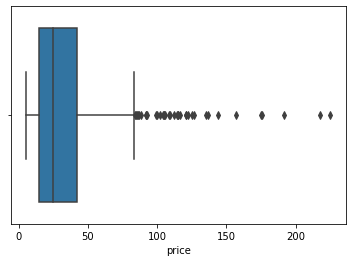

In [116]:
#Représentation graphique des valeurs atypiques par une boite à moustache 
sns.boxplot(erp_web1['price'])

### Aller plus loin: méthode par Zscore

C:\Users\samir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

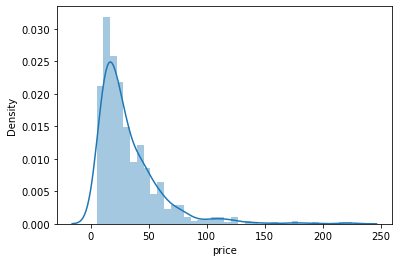

In [138]:
#Représentation de l'échantillon par un diagramme en bar 
sns.distplot(erp_web1['price'], kde=True)

C:\Users\samir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

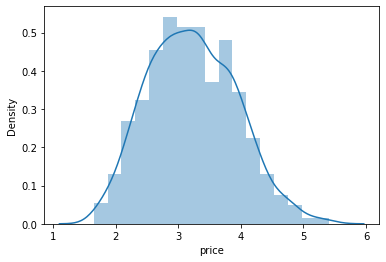

In [119]:
#transformation en loi normale
erp_web_log= np.log(erp_web1['price'])
sns.distplot(np.log(erp_web1['price']), kde=True)

In [123]:
#Zscore = (dataset -mean) / std. déviation
erp_mean=erp_web_log.mean()
erp_std=erp_web_log.std()
erp_mean,erp_std

(3.2230830795801992, 0.7009509349435723)

In [127]:
#distribution centrée et réduite ,on enleve la moyenne  et on divise par l'ecart_type
zscore = (erp_web_log - erp_mean) / erp_std
zscore

0     -0.052401
1      0.445198
2     -0.268393
3     -0.823037
4      0.863910
         ...   
820    0.129970
821    1.442360
822    1.113640
823    0.077126
824   -0.616189
Name: price, Length: 825, dtype: float64

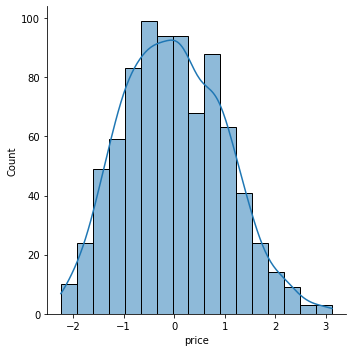

In [129]:
sns.displot((zscore), kde=True)

In [130]:
#Déterminer un seuil haut et un seuil bas pour trouver les valeurs atypiques 
treshold_low= np.exp(-2*erp_std+erp_mean)
treshold_high=np.exp(+2*erp_std+erp_mean)
treshold_low,treshold_high

(6.1791530162668264, 102.00123789818504)

In [131]:
#Sélection des valeurs atypiques qui sont en dessous du seuil bas et au dessus du seuil haut 
erp_web1[(erp_web1['price']<treshold_low)|(erp_web1['price']>treshold_high)]

,product_id,id_web,sku,onsale_web,price,total_sales,ca_produit
30,4594,NaN,NaN,1.0,144.0,NaN,NaN
188,4172,16210,16210,1.0,5.7,43.0,245.1
189,4173,16211,16211,1.0,5.7,13.0,74.1
190,4174,16209,16209,1.0,5.7,6.0,34.2
209,4198,16322,16322,1.0,5.8,0.0,0.0
210,4200,16295,16295,1.0,5.8,46.0,266.8
291,4352,15940,15940,1.0,225.0,5.0,1125.0
293,4355,12589,12589,1.0,126.5,11.0,1391.5
310,4402,3510,3510,1.0,176.0,13.0,2288.0
311,4404,3507,3507,1.0,108.5,2.0,217.0


<AxesSubplot:xlabel='price', ylabel='total_sales'>

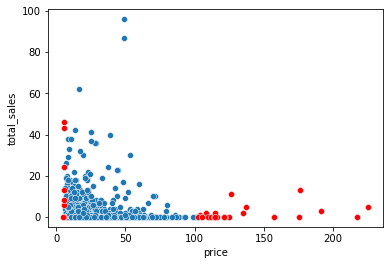

In [137]:
# Représentation des valeurs atypiques basses et hautes en rouge  
sns.scatterplot(x=erp_web1['price'], y=erp_web1['total_sales'])
sns.scatterplot(x=erp_web1[(erp_web1['price']<treshold_low)|(erp_web1['price']>treshold_high)]['price'], y=erp_web1[(erp_web1['price']<treshold_low)|(erp_web1['price']>treshold_high)]['total_sales'] ,color = 'r')